Strike	Dip	σ	Trend	Plunge	τ	Trend	Plunge
0.0	30.0	20.00	270.0	60.0	17.32	270.0	-30.0
0.0	45.0	30.00	270.0	45.0	20.00	270.0	-45.0
0.0	60.0	40.00	270.0	30.0	17.32	270.0	-60.0
180.0	30.0	20.00	90.0	60.0	-17.32	90.0	-30.0
180.0	45.0	30.00	90.0	45.0	-20.00	90.0	-45.0
180.0	60.0	40.00	90.0	30.0	-17.32	90.0	-60.0
45.0	30.0	17.50	315.0	60.0	-13.92	291.0	-27.8
45.0	45.0	25.00	315.0	45.0	-16.58	281.3	-39.8
45.0	60.0	32.50	315.0	30.0	-15.61	261.9	-46.1
135.0	30.0	17.50	45.0	60.0	13.92	69.0	-27.8
135.0	45.0	25.00	45.0	45.0	16.58	78.7	-39.8
135.0	60.0	32.50	45.0	30.0	15.61	98.1	-46.1


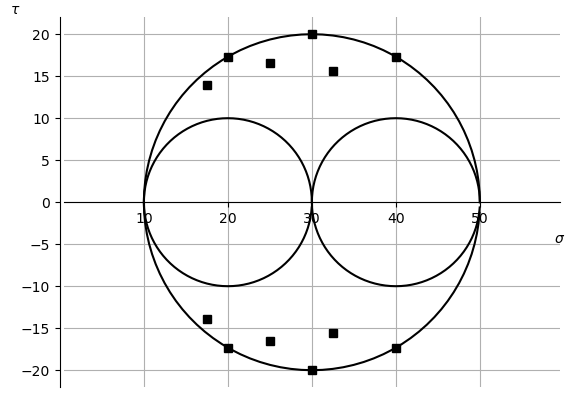

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
rad = 180/np.pi

# Import mohr_circle_stress
import sys, os
sys.path.append(os.path.abspath("../functions"))
from mohr_circle_stress import mohr_circle_stress

# Stress tensor in principal stress coordinate system
stress = np.array([[50, 0, 0],[ 0, 30, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([90, 0, 90])

# Planes
planes = np.zeros((12,2))
# Strikes in degrees
planes[0:3,0] = 0
planes[3:6,0] = 180
planes[6:9,0] = 45
planes[9:12,0] = 135
# Dips in degrees
planes[0:12:3,1] = 30
planes[1:12:3,1] = 45
planes[2:12:3,1] = 60

# Convert to radians
planes = planes/rad
 
# Plot Mohr circle
fig, ax = plt.subplots()
ns,ons = mohr_circle_stress(stress,tx1,px1,tx3,planes,ax)

# Print normal and shear tractions
print("Strike","Dip","\u03C3","Trend","Plunge","\u03C4",
      "Trend","Plunge",sep="\t")

# return to degrees
planes = planes*rad
ons = ons*rad
# print
for i in range(0,np.size(planes,0)):
    print(f"{planes[i,0]:.1f}",f"{planes[i,1]:.1f}",
          f"{ns[i,0]:.2f}",f"{ons[i,0]:.1f}",
          f"{ons[i,1]:.1f}",f"{ns[i,1]:.2f}",
          f"{ons[i,2]:.1f}",f"{ons[i,3]:.1f}",sep="\t")
    
# show the plot
plt.show()

In [ ]:
# Run this cell if you want to save the figure
fig.savefig("mohr_circle_stress.png", dpi=300)